In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# 한글 폰트 설정 (macOS)
import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 1차원 선형 회귀용 데이터 생성
X, y = make_regression(n_samples=100, n_features=1,
                       noise=15, random_state=42)

# 정규화 (Ridge에서는 특히 유효함)
sc = StandardScaler()
X_std = sc.fit_transform(X)

## OLS (Ordinary Least Squares)

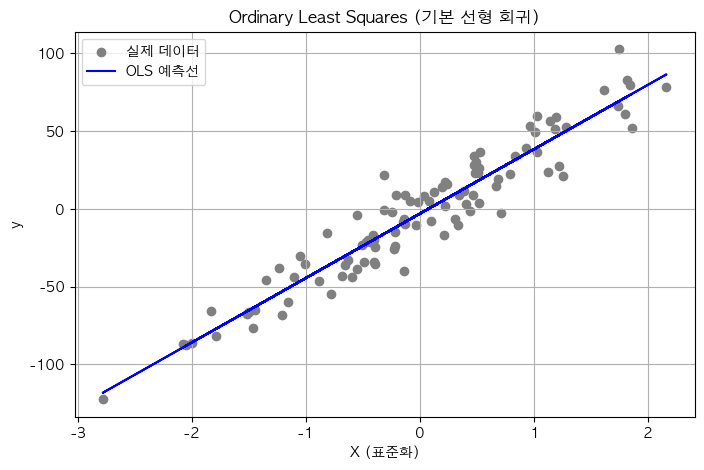

In [8]:
# OLS 선형 회귀 모델 학습
ols = LinearRegression()
ols.fit(X_std, y)

# 예측
y_pred_ols = ols.predict(X_std)

# 시각화
plt.figure(figsize=(8, 5))
plt.scatter(X_std, y, color='gray', label='실제 데이터')
plt.plot(X_std, y_pred_ols, color='blue', label='OLS 예측선')
plt.title("Ordinary Least Squares (기본 선형 회귀)")
plt.xlabel("X (표준화)")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Ridge Regression

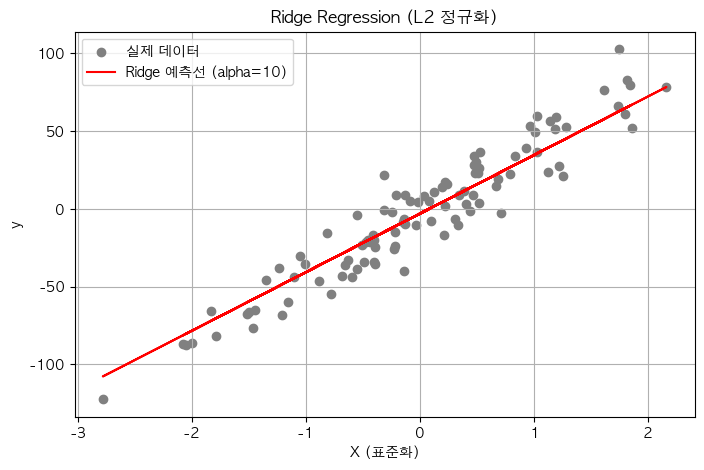

In [6]:
# Ridge 회귀 (정규화 강도 alpha=10)
ridge = Ridge(alpha=10)
ridge.fit(X_std, y)

# 예측
y_pred_ridge = ridge.predict(X_std)

# 시각화
plt.figure(figsize=(8, 5))
plt.scatter(X_std, y, color='gray', label='실제 데이터')
plt.plot(X_std, y_pred_ridge, color='red', label='Ridge 예측선 (alpha=10)')
plt.title("Ridge Regression (L2 정규화)")
plt.xlabel("X (표준화)")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## OLS vs Ridge Regression

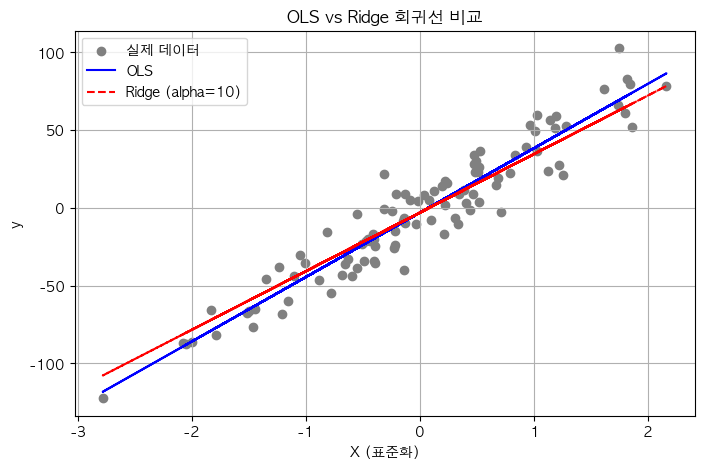

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(X_std, y, color='gray', label='실제 데이터')
plt.plot(X_std, y_pred_ols, color='blue', label='OLS')
plt.plot(X_std, y_pred_ridge, color='red', linestyle='--', label='Ridge (alpha=10)')
plt.title("OLS vs Ridge 회귀선 비교")
plt.xlabel("X (표준화)")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### alpha에 대한 Ridge Regression

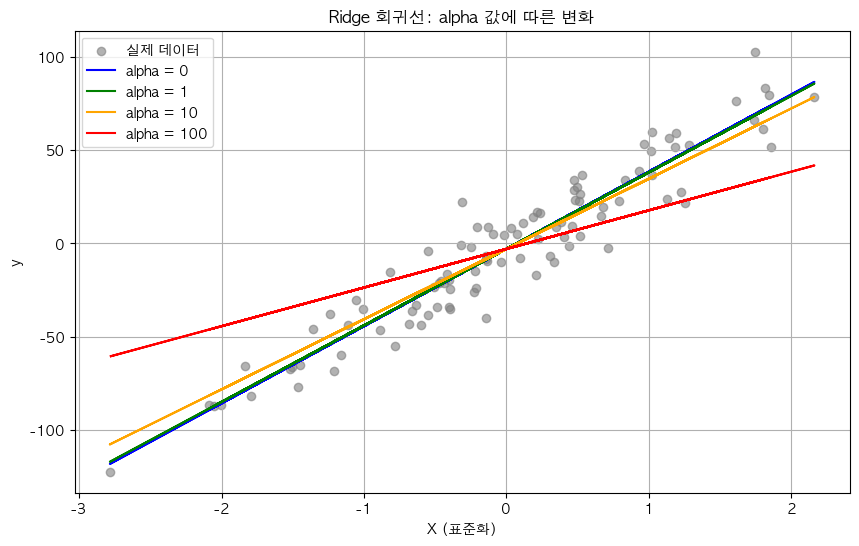

In [16]:
alphas = [0, 1, 10, 100]
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(10, 6))
plt.scatter(X_std, y, color='gray', label='실제 데이터', alpha=0.6)

for alpha, color in zip(alphas, colors):
    model = Ridge(alpha=alpha)
    model.fit(X_std, y)
    y_pred = model.predict(X_std)
    plt.plot(X_std, y_pred, color=color, label=f'alpha = {alpha}')

plt.title("Ridge 회귀선: alpha 값에 따른 변화")
plt.xlabel("X (표준화)")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()